In [35]:
import numpy as np
import random
import os
import sys
import pandas as pd
from pandas import read_table, read_csv
import matplotlib.pyplot as plt
import seaborn as sb
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

First let's load the data to a varible named "data_set" in a way it understand that values represented as '?' are meant to be understood as NaN (meaning it's missing data).

In [36]:
# read the csv table using Pandas
# identify missing values as ?
data_set = pd.read_csv('hcc_dataset.csv', na_values=['?'], sep=",")
data_set_disposable = data_set.copy()
# read_csv understand "None" value as being "NaN" so we have to replace every "NaN" value in Ascites and Encephalopathy to "None"
data_set.loc[data_set_disposable["Ascites"].isnull(),"Ascites"] = "None" 
data_set.loc[data_set_disposable["Encephalopathy"].isnull(),"Encephalopathy"] = "None" 
data_set_disposable.loc[data_set_disposable["Ascites"].isnull(),"Ascites"] = "None"
data_set_disposable.loc[data_set_disposable["Encephalopathy"].isnull(),"Encephalopathy"] = "None"


Unfortunately, the column " Albunim" has a white space at the beginning, so to avoid dealing with this problem later one, we'll strip every column so as not to leave any white spaces if we decide to investigate each one individually.
We'll also do it to each existing value.

In [37]:
list0 = []
for i in range(len(data_set.columns)):
    list0.append(data_set.columns[i].strip())
    if data_set[data_set.columns[i]].dtype == object: data_set[data_set.columns[i]].str.strip()
data_set.columns = list0

To get an idea of what we're analizing let's show the table loaded to data_set.

In [38]:
pd.set_option('display.max_rows', 10)  # Set to display 170 rows
pd.set_option('display.max_columns', 50)  # Set to display 50 columns
#pd.reset_option('display.max_rows')  # Set to display default columns
#pd.reset_option('display.max_columns')  # Set to display default columns

# show the table
data_set

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,NaN,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137.0,15.0,Active,None,None,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0.0,NaN,Active,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50.0,50.0,Ambulatory,None,Mild,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40.0,30.0,Active,None,None,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100.0,30.0,Active,None,None,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,NaN,NaN,NaN,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,40,NaN,NaN,Active,None,None,0.84,NaN,15.4,109.2,9.3,184000.0,4.6,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,Lives
161,Female,Yes,No,NaN,NaN,NaN,NaN,Yes,No,No,No,No,No,Yes,No,NaN,No,Yes,Yes,Yes,No,No,Yes,68,0.0,0.0,Ambulatory,None,None,1.33,4887.0,12.1,88.9,2.5,141.0,3.0,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,NaN,NaN,NaN,NaN,No,No,Yes,65,NaN,48.0,Active,None,None,1.13,75.0,13.3,90.0,8.0,385000.0,4.3,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,NaN,NaN,NaN,Yes,Yes,Yes,44,NaN,NaN,Ambulatory,None,None,2.14,94964.0,15.6,117.3,5200.0,118000.0,4.8,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,Dies


In [39]:
data_set.shape

(165, 50)

By the given table we understand that we have **165** cases each **50** features (variables/columns) being analized.

Now let's see how mamy cases have **no missing data**.

In [40]:
data_set_noNullValues = data_set_disposable
data_set_noNullValues.dropna(inplace=True)
data_set_noNullValues 

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50.0,50.0,Ambulatory,None,Mild,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,Lives
15,Female,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,41,100.0,0.0,Restricted,None,Mild,1.61,4.6,10.2,89.6,5.5,161.0,3.1,3.1,24.0,57.0,163.0,176.0,5.0,0.80,2.0,2.6,1.3,25.0,13.0,60.0,Lives
28,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,61,60.0,67.5,Restricted,None,None,1.30,3255.0,12.2,89.5,4.4,108.0,3.0,1.1,59.0,85.0,419.0,293.0,7.7,0.67,2.0,6.5,0.4,94.0,27.0,70.0,Dies
61,Male,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,56,100.0,40.0,Active,Grade I/II,Mild,1.46,41.0,14.6,100.8,5.5,42000.0,3.1,3.7,121.0,165.0,101.0,207.0,6.3,0.69,1.0,3.0,1.9,224.0,95.0,363.0,Lives
67,Male,Yes,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,63,100.0,0.0,Active,None,None,2.07,1.7,9.5,99.2,3300.0,79000.0,2.1,1.6,56.0,82.0,134.0,113.0,37.0,0.40,1.0,2.7,0.2,94.0,37.0,48.0,Lives
90,Male,Yes,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,No,69,100.0,0.0,Ambulatory,None,Moderate/Severe,1.41,123.0,10.1,89.5,2.3,89000.0,4.0,4.3,31.0,60.0,75.0,177.0,6.8,0.70,3.0,3.5,1.0,37.0,11.0,173.0,Dies
108,Male,Yes,Yes,No,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,No,Yes,No,Yes,Yes,85,100.0,0.0,Restricted,None,None,1.25,173.0,11.3,103.9,6200.0,176000.0,2.4,1.7,63.0,114.0,80.0,163.0,6.1,0.67,5.0,20.0,0.5,131.0,78.0,1316.0,Dies
122,Male,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,Yes,No,51,75.0,52.5,Ambulatory,None,None,1.56,50655.0,9.8,85.6,3900.0,132000.0,2.6,2.6,123.0,219.0,503.0,363.0,7.3,0.55,1.0,4.0,1.5,40.0,12.0,57.0,Dies


It appears that we only have **8 perfect cases**.

To get general info on how many values we have in each column and what data type it is we can use the following function:

In [41]:
#Column: (number of Non-Null elements, data type)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null    obj

In [42]:
# name of columns
data_set.columns

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

The **describe()** function only gives us data from columns containing numerical values, thus showing only 23 columns.

In [43]:
data_set.describe()

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
count,165.000000,117.000000,112.000000,161.000000,1.570000e+02,162.000000,162.000000,162.000000,162.000000,159.000000,160.000000,161.000000,162.000000,162.000000,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000
mean,64.690909,71.008547,20.464286,1.421851,1.929995e+04,12.879012,95.119753,1473.961549,113206.442654,3.445535,3.087938,67.093168,96.382716,268.026543,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647
std,13.319534,76.277680,51.565130,0.477816,1.490983e+05,2.145237,8.405846,2909.106006,107118.632481,0.685132,5.499379,57.539747,87.484241,258.750319,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454
min,20.000000,0.000000,0.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,1.170000,5.200000e+00,11.425000,89.775000,5.100000,255.750000,3.000000,0.800000,31.000000,46.250000,91.250000,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000
50%,66.000000,75.000000,0.000000,1.300000,3.300000e+01,13.050000,94.950000,7.200000,93000.000000,3.400000,1.400000,50.000000,71.000000,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000
75%,74.000000,100.000000,30.500000,1.530000,6.150000e+02,14.600000,100.675000,19.525000,171500.000000,4.050000,2.925000,78.000000,110.250000,345.250000,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,118.000000,56.000000,706.000000
max,93.000000,500.000000,510.000000,4.820000,1.810346e+06,18.700000,119.600000,13000.000000,459000.000000,4.900000,40.500000,420.000000,553.000000,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000


Let's analize each column with **numerical** data type by creating **density** graphs that represent each of them.

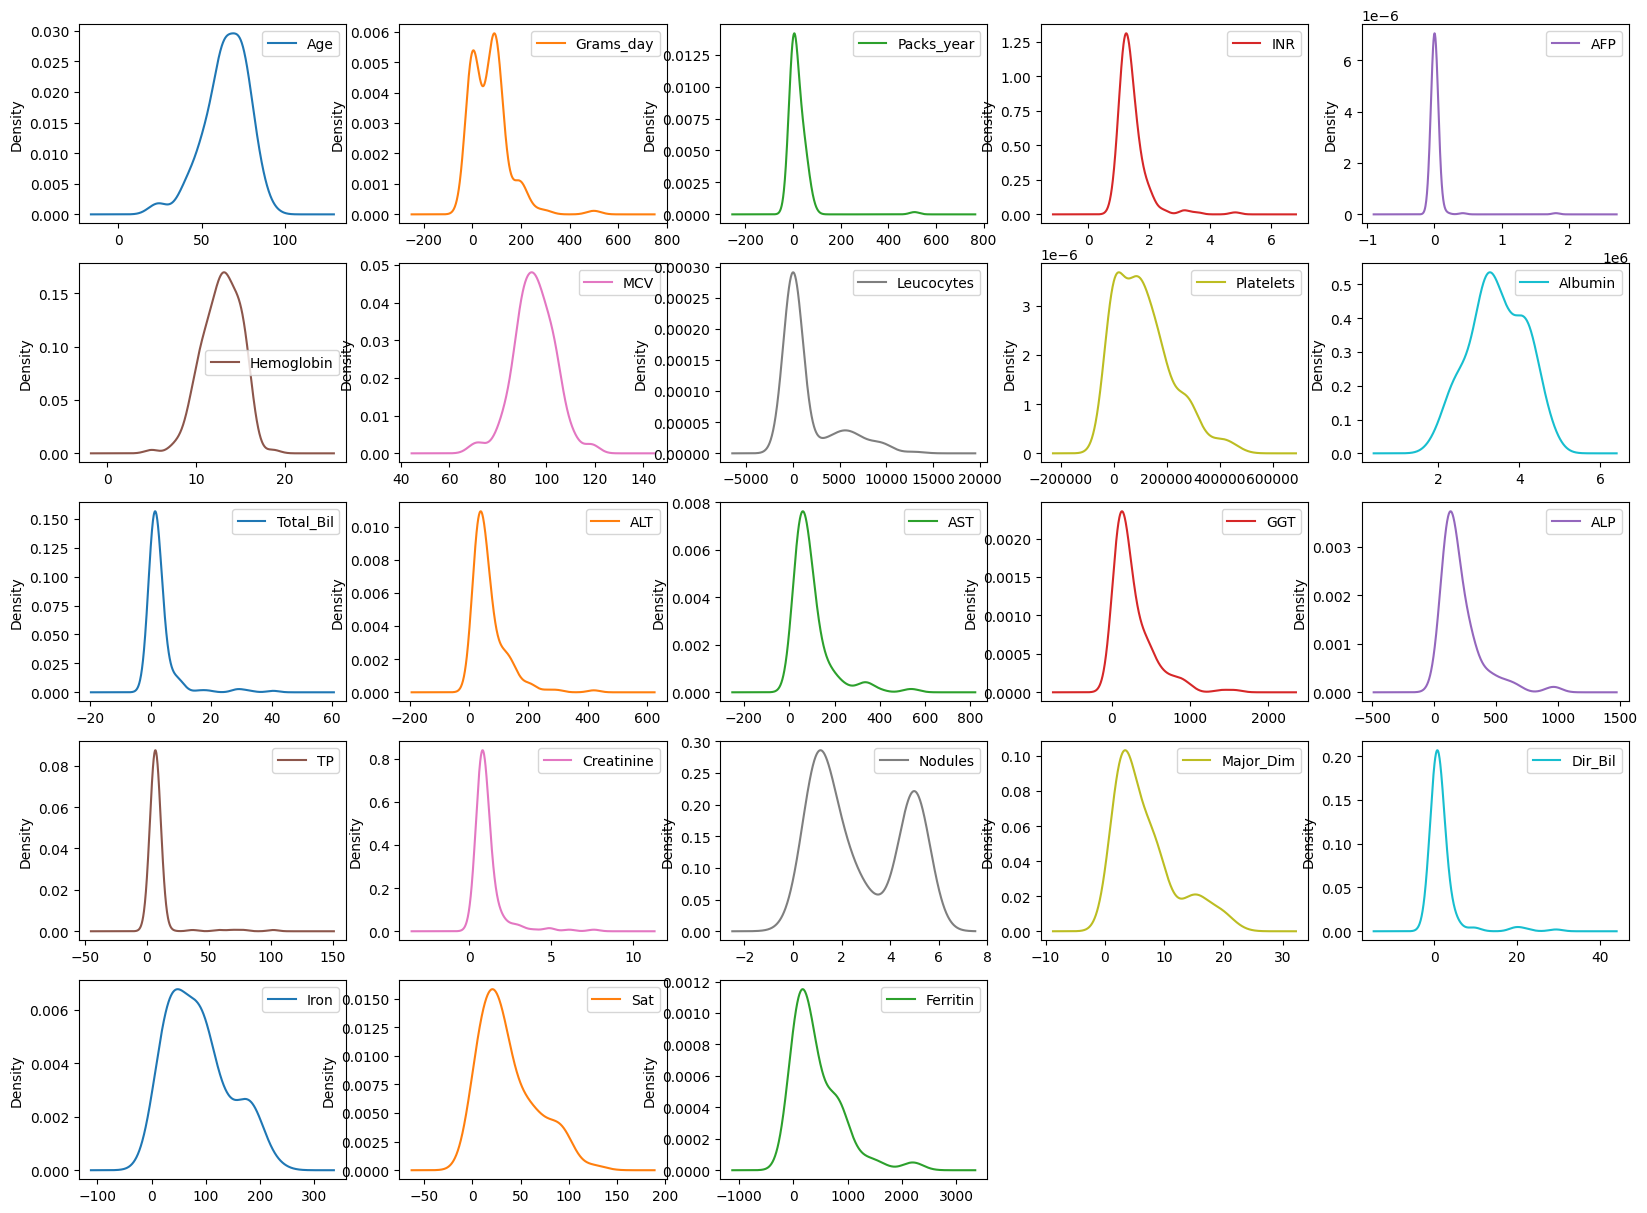

In [44]:
#only shows columns with numerical values
data_set.plot(kind='density', subplots=True, layout=(5, 5), figsize=(20, 15), sharex=False)
plt.show()

Now let's plot each column with **numerical** data type while also taking into account the **"Class"** that each case falls into by creating **violin plots** that represent each of them.

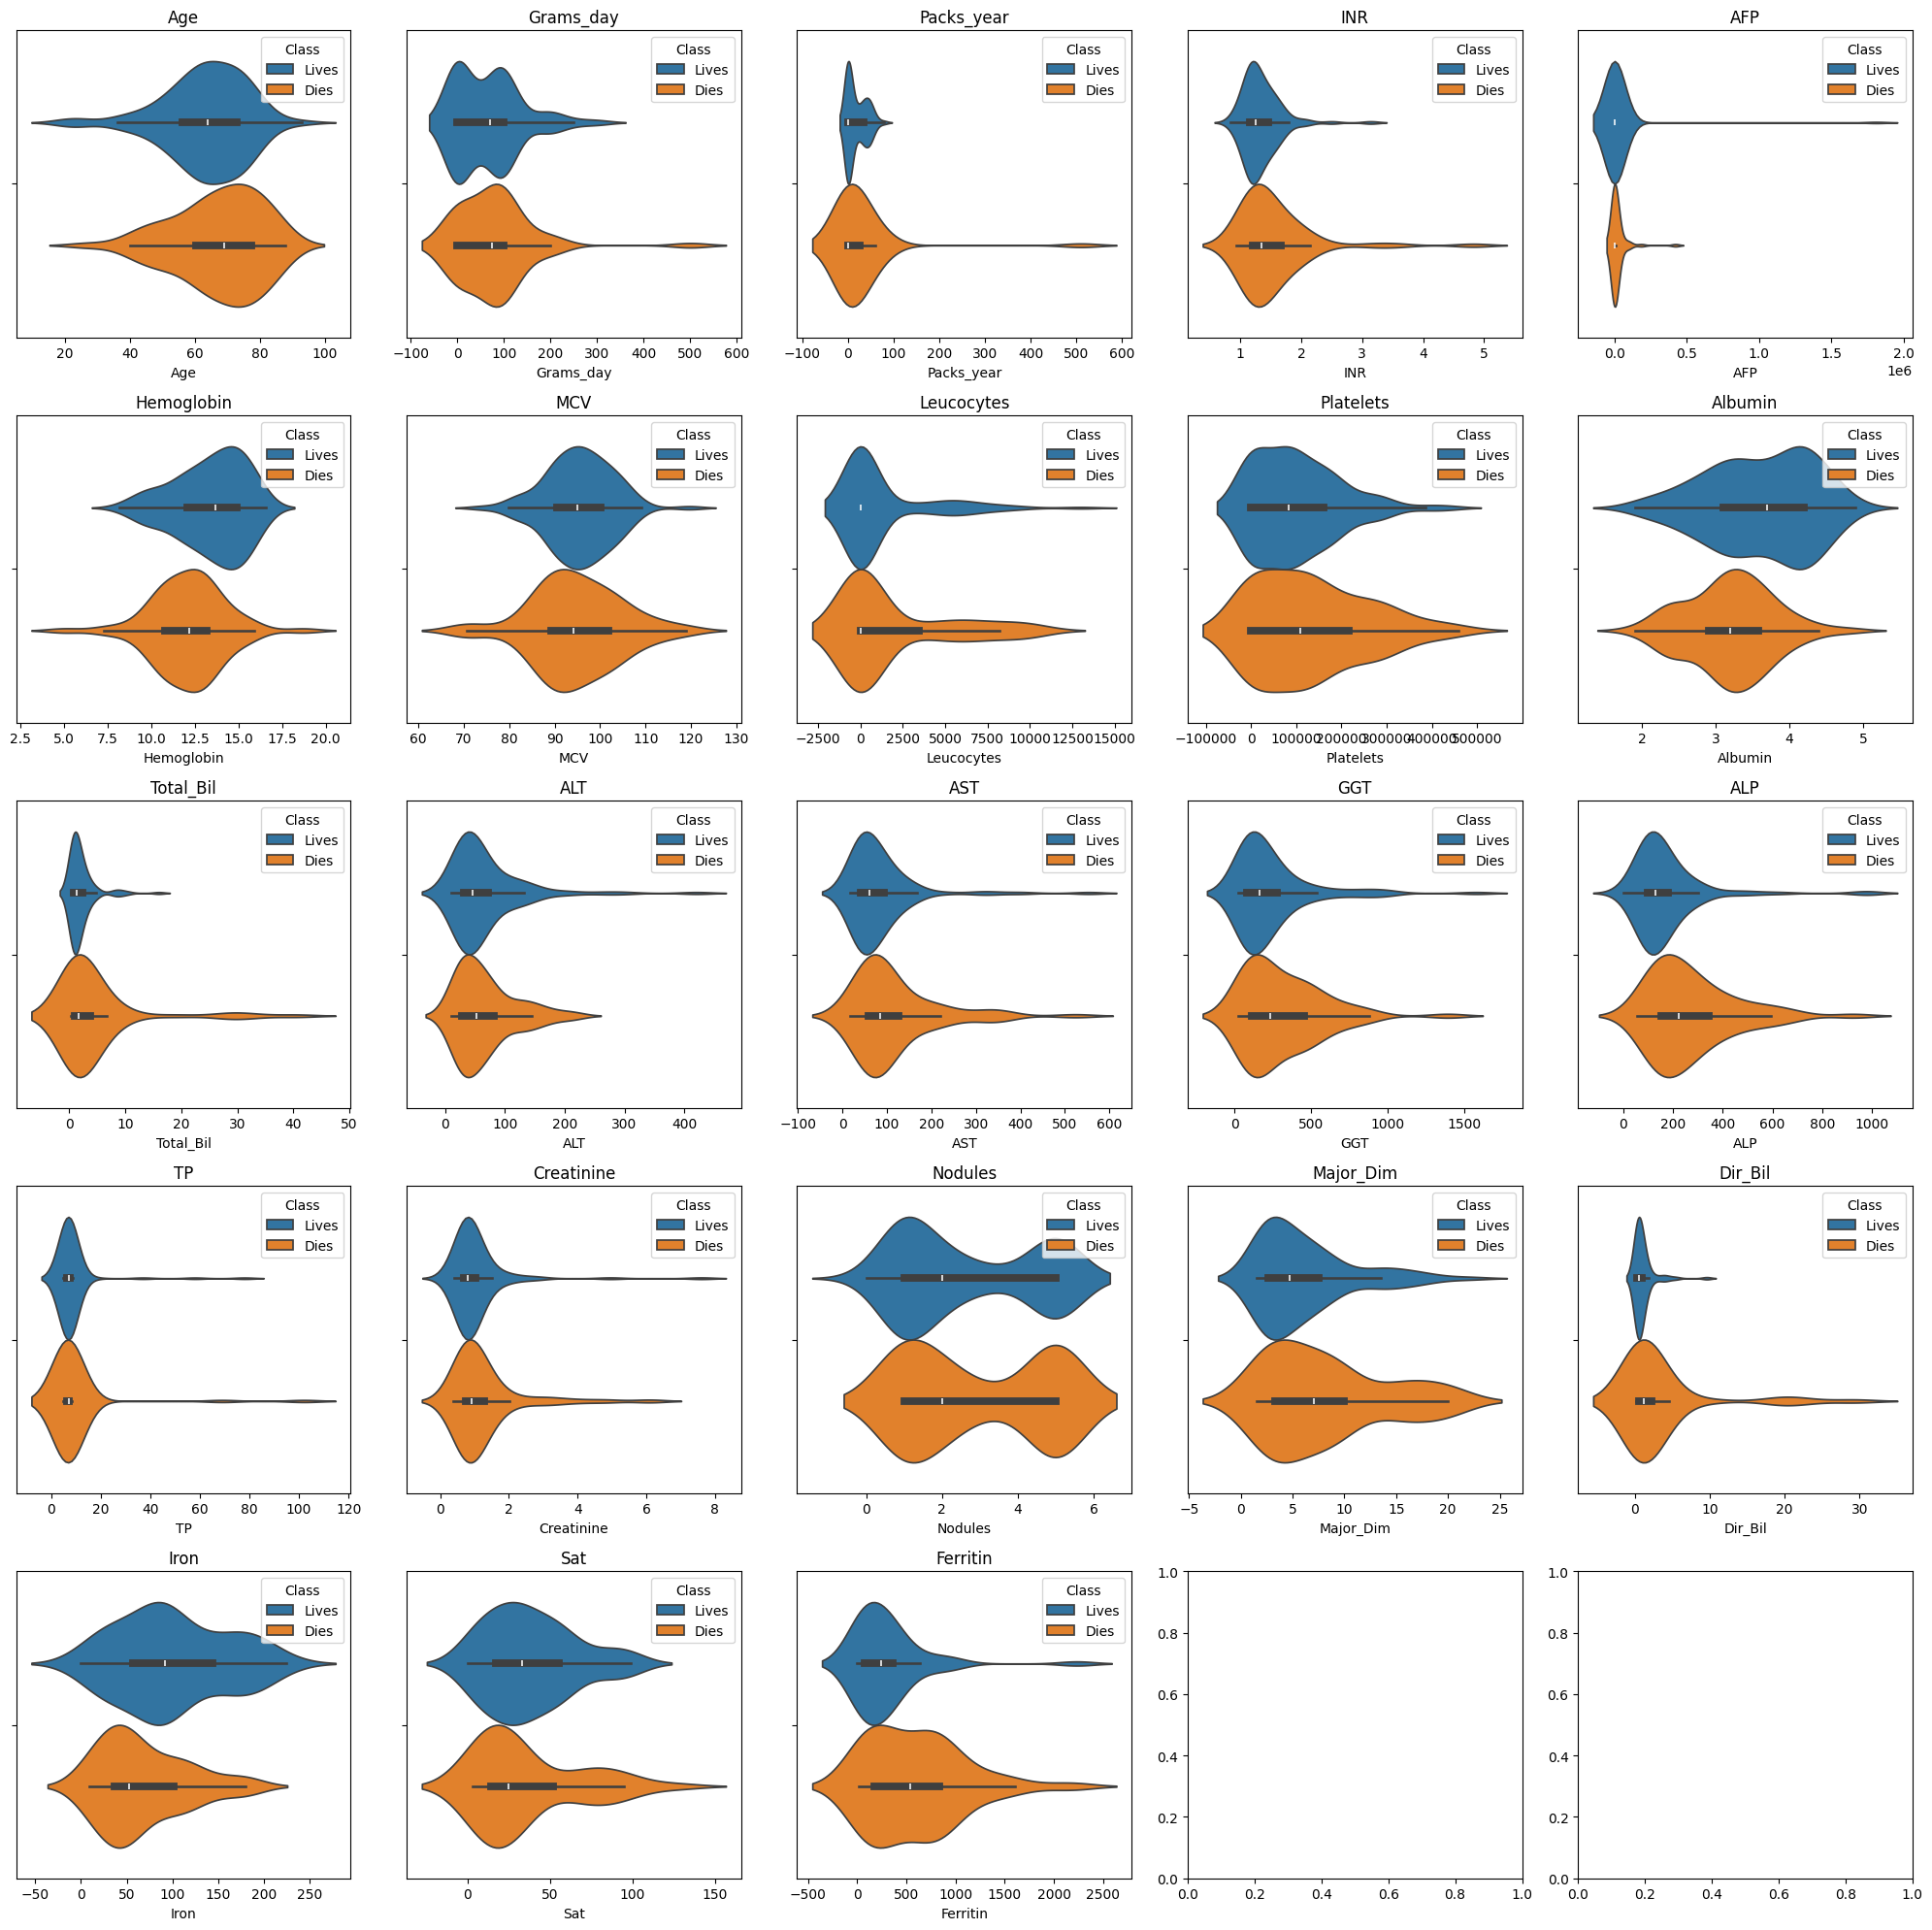

In [45]:
numerical_columns = data_set.select_dtypes(include=[int,float])

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Plot count plots with hue for object columns using Seaborn
for idx, column in enumerate(numerical_columns.columns):
    #sb.countplot(data=data_set, x=column, hue="Class", ax=axes.flatten()[idx])
    sb.violinplot(x = column, hue="Class", data = data_set, ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Now let's represent them in a **scatter** kind of plot.

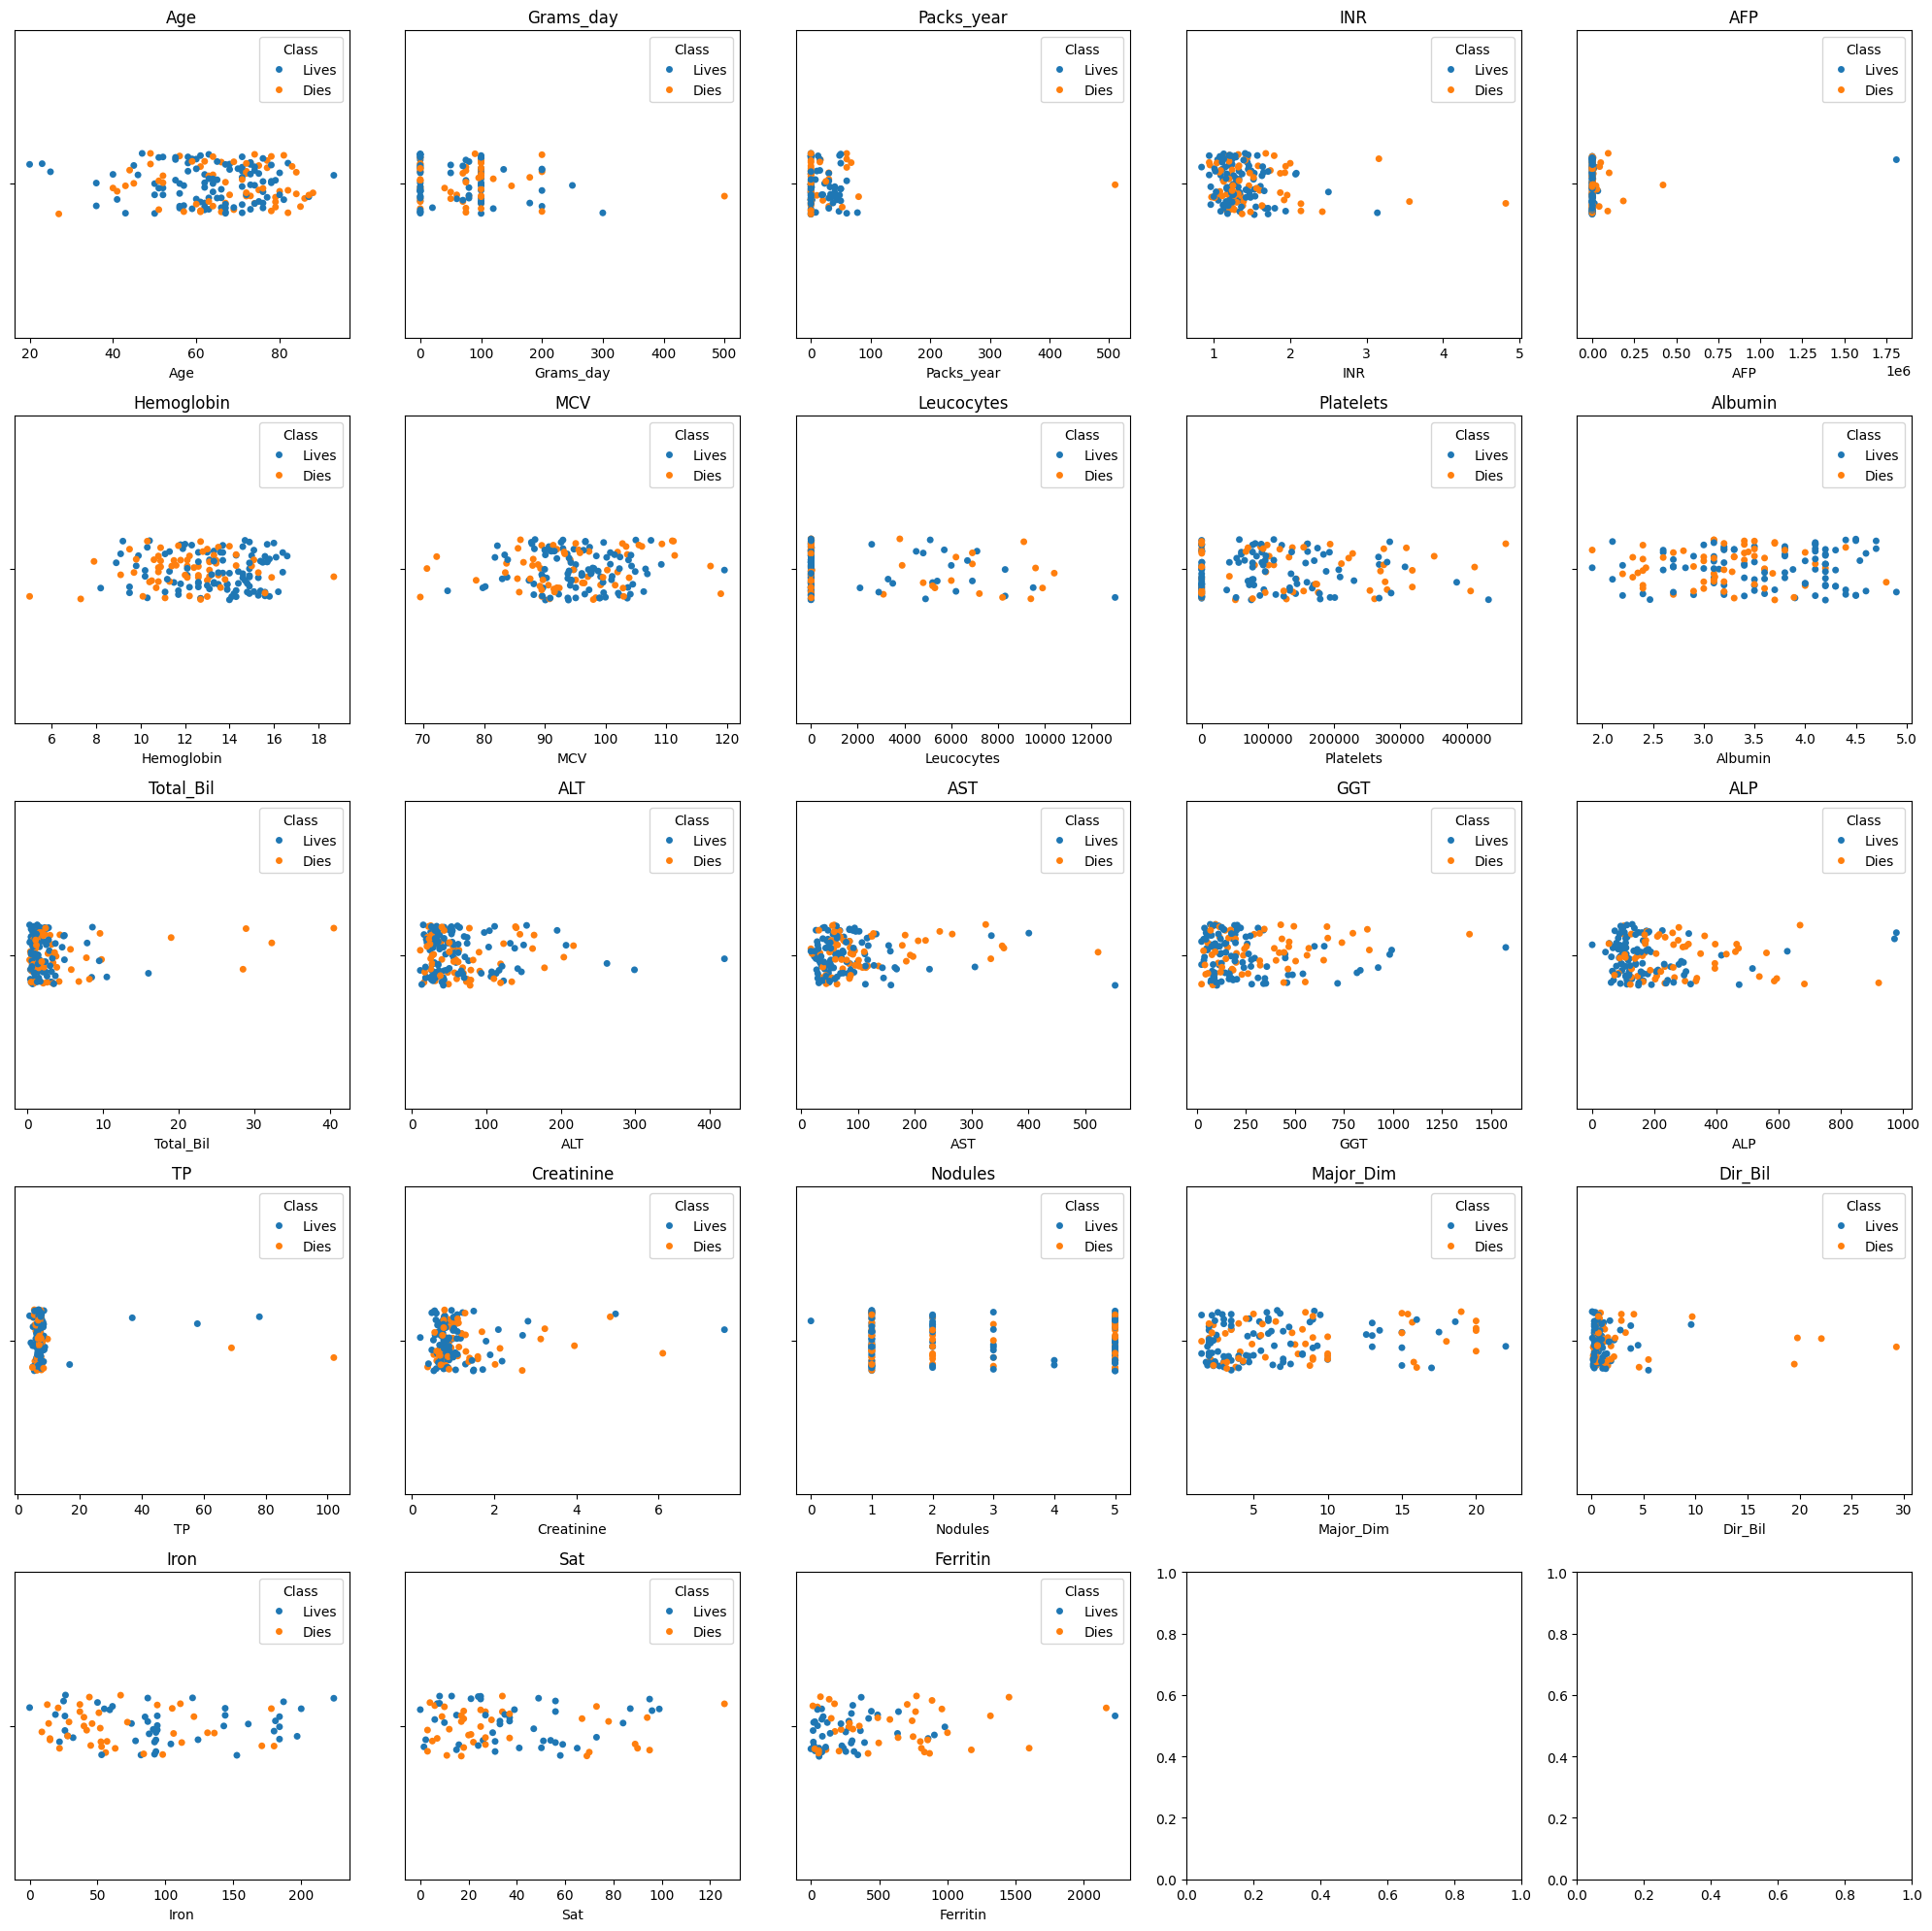

In [46]:
numerical_columns = data_set.select_dtypes(include=[int,float])

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))

# Plot count plots with hue for object columns using Seaborn
for idx, column in enumerate(numerical_columns.columns):
    #sb.countplot(data=data_set, x=column, hue="Class", ax=axes.flatten()[idx])
    sb.stripplot(x = column, hue="Class", data = data_set,ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Let's analize each column with **object** data type by creating **pie** graphs that represent each of them.

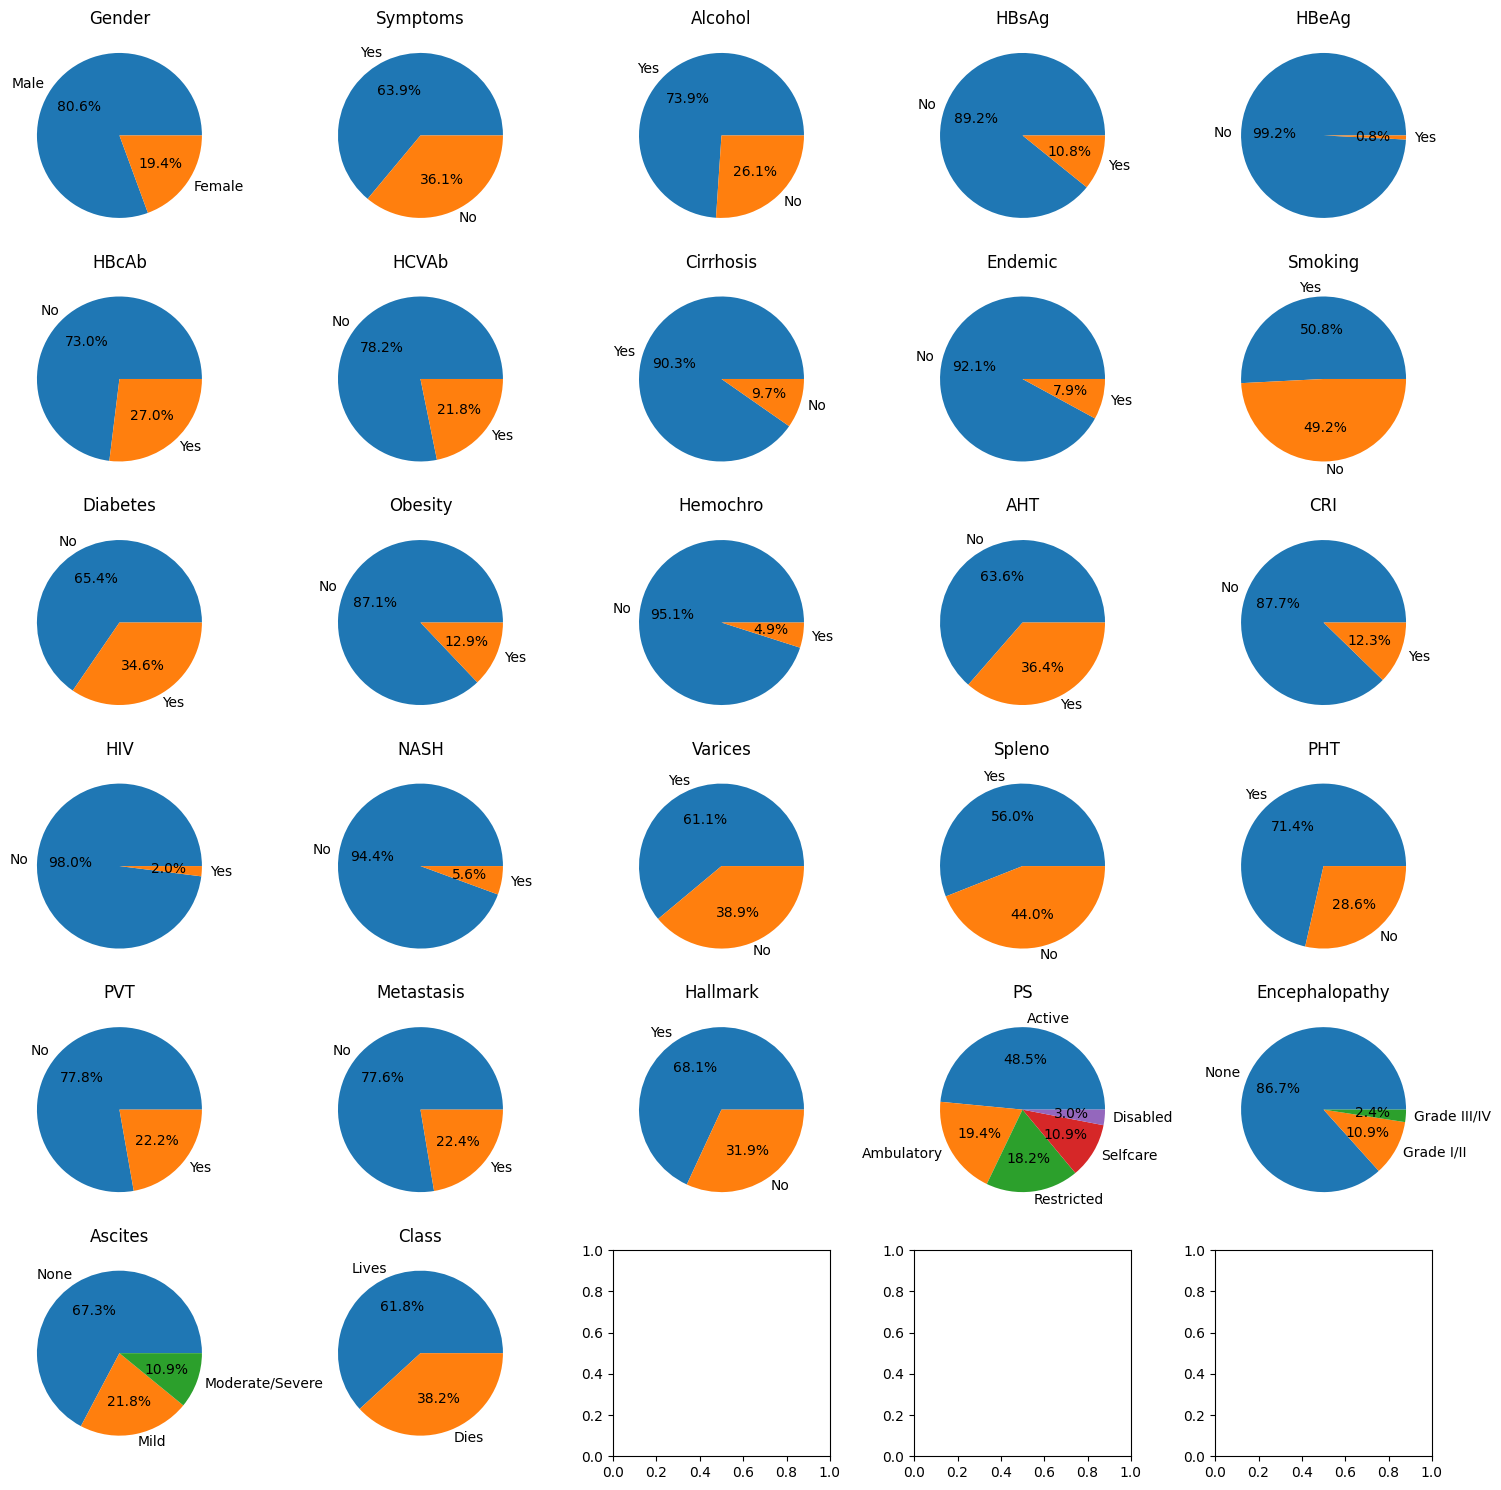

In [47]:
object_columns = data_set.select_dtypes(include=object)

# Create subplots
num_cols = len(object_columns.columns)
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(15, 15))

# Plot pie charts for object columns
for idx, column in enumerate(object_columns.columns):
    counts = object_columns[column].value_counts()
    axes.flatten()[idx].pie(counts, labels=counts.index, autopct='%1.1f%%')
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Now let's plot each column with **object** data type while also taking into account the **"Class"** that each case falls into by creating **count plots** that represent each of them.

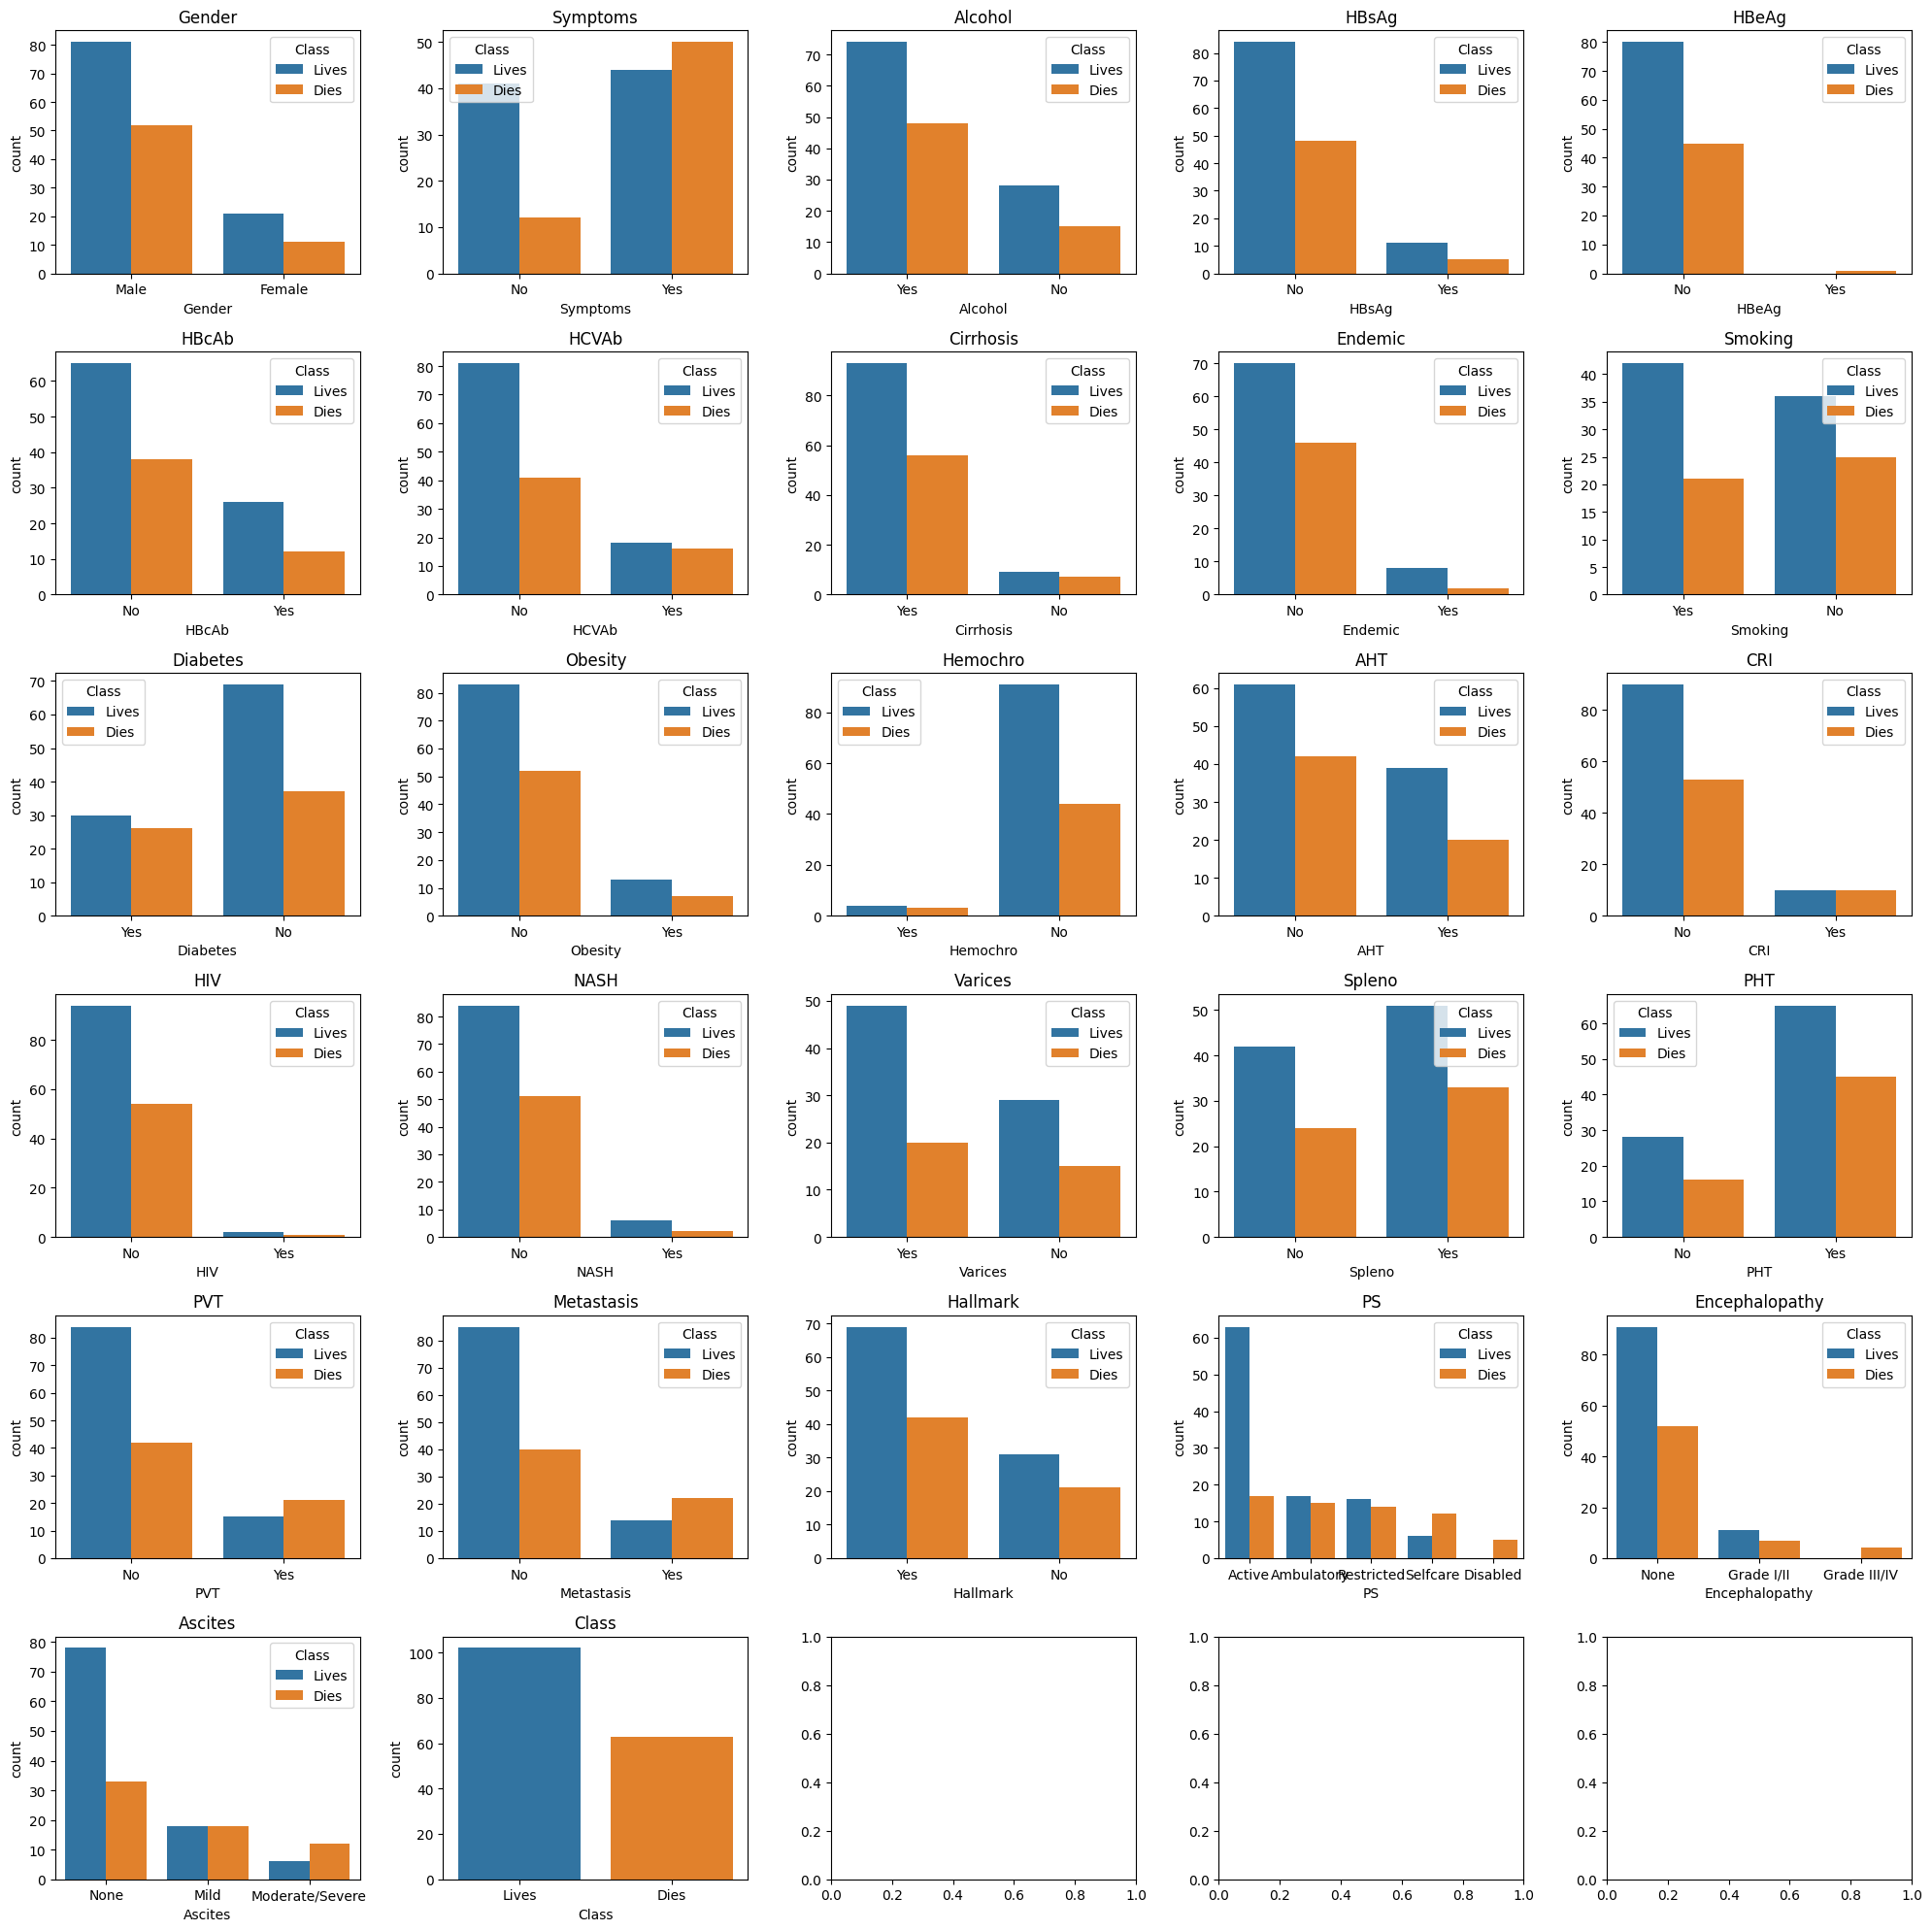

In [48]:
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))

# Plot count plots with hue for object columns using Seaborn
for idx, column in enumerate(object_columns.columns):
    sb.countplot(data=object_columns, x=column, hue="Class", ax=axes.flatten()[idx])
    axes.flatten()[idx].set_title(column)

plt.tight_layout()
plt.show()

Plotting function takes a long time to render due to too much data (165 rows, 50 columns) and the fact that there are so **many columns** to analize that the subplots end up being to small to fit on screen.
Not to mention that **most of the cases** have at least one column as "NaN" not being rendered into the graphs.
Therefore, some **columns need to be filtered or discarded** and we have to find a way to **turn every "NaN" value** into something that can be considered **average**.

In [49]:
# We have to temporarily drop the rows with 'NA' values because the Seaborn plotting function does not know what to do with them
#sb.pairplot(data_set.dropna(), hue='Class',height=20, aspect=1)

Comparing 2 columns with sns.relplot() takes way less time.

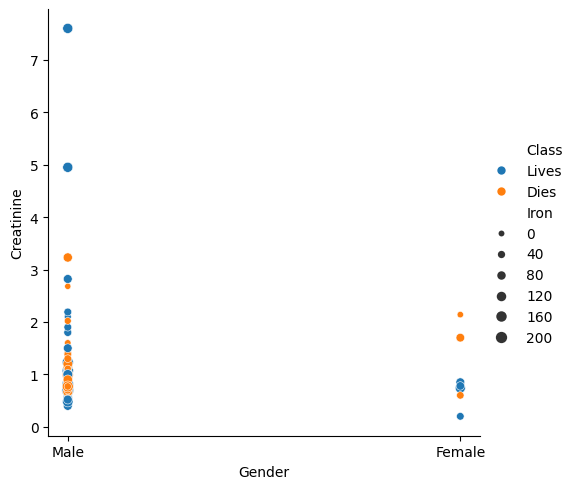

In [50]:
# Include Seaborn for some graphics
#sb.set(style = "whitegrid")
# scatter plot: joint distribution of two variables (hue and size are optional)
sb.relplot(x = "Gender", y = "Creatinine",hue="Class",size="Iron", data = data_set)

Class
Lives    102
Dies      63
Name: count, dtype: int64

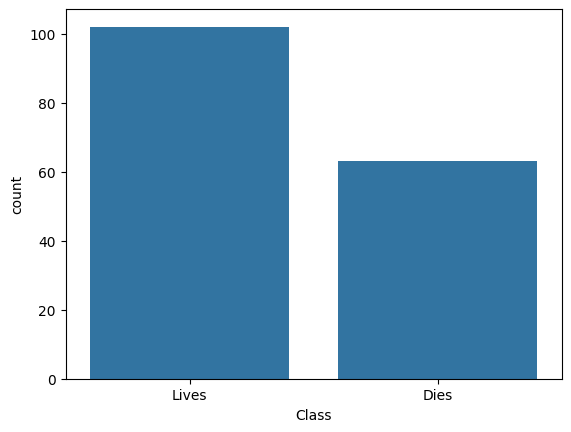

In [51]:
sb.countplot(x="Class",data = data_set)
data_set["Class"].value_counts()

To get the heatmap of all the correlations between the numerical features:

<Axes: >

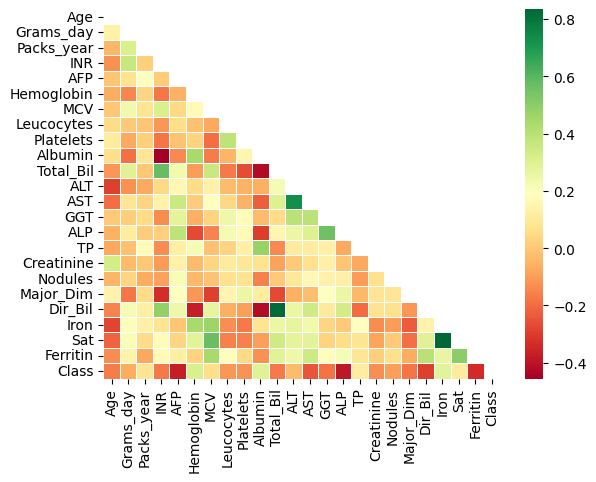

In [52]:
class_numerical = data_set.copy()
class_numerical.loc[class_numerical["Class"] == "Lives",["Class"]] = 1
class_numerical.loc[class_numerical["Class"] == "Dies",["Class"]] = 0
class_numerical['Class'] = class_numerical['Class'].astype(int)
class_numerical["Class"].dtype

sb.heatmap(class_numerical.corr(method="spearman",numeric_only=True), mask=np.triu(class_numerical.corr(numeric_only=True)), cmap="RdYlGn", linewidth=.5)


But if we want to specially analize how they correlate to the "Class" feature:

In [53]:
class_numerical.corr(method="spearman", numeric_only=True)["Class"].sort_values(ascending=False)

Class         1.000000
Hemoglobin    0.314035
Albumin       0.295054
Iron          0.283248
TP            0.116123
                ...   
AST          -0.248587
Dir_Bil      -0.292743
Ferritin     -0.337670
AFP          -0.370365
ALP          -0.388299
Name: Class, Length: 24, dtype: float64

<Axes: >

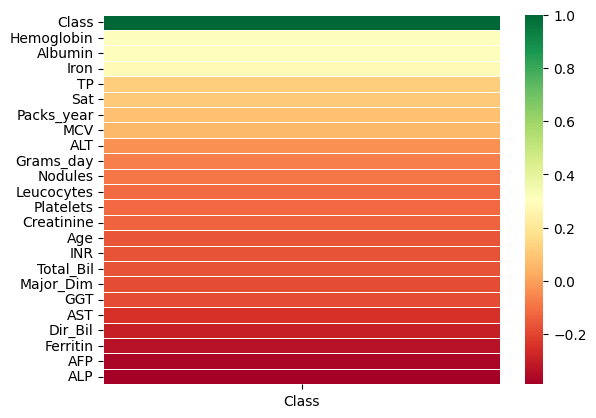

In [54]:
class_corr = class_numerical.corr(method="spearman", numeric_only=True)["Class"].sort_values(ascending=False)
class_corr_df = class_corr.to_frame()
sb.heatmap(class_corr_df, cmap="RdYlGn", linewidth=.5)

**Conclusions:** to what concern the numerical features, the greater the value of "Hemoglobin","Albumin","Iron" the higher probability of the patient surviving. The reverse happens to the features at the bottom.

FROM A DATA PREPROCESSING STANDPOINT:

INDIVIDUAL CLEANING



Let's deal with Platelets missing digits before that, for example 77 -> 77000, as it was an outlier we easily figured out this was the input mistake in case.


For the Creatinine values, medical reaserchers say that those values higher than 4.0 milligrams per decilitre, indicate severe kidney disfunction or even failure, so for someone diagnosed with HCC, having that amount of creatinine would be deadly. Therefor in the dataset as there a half dozen of those values where the patient still lives, we may consider as wrongly evaluated or inputed to the dataset, as such values are most likely 4.0 -> 0.4, a normal range for creatinine in a human.

Lastly, just like PLatelets, Leucocytes values are usually measured in two ways, but in the data set, many of tthe values are measured by cells/L, so its humanly impossible to have values higher than 1000 cells/L, so higher than 1000 should be considered 1+. Just like AFP.

In [55]:
# Function to correct "Platelets" values
def correct_platelets(value):
    if value <= 1000:
        return value * 1000
    return value

# Apply such function
data_set["Platelets"] = data_set["Platelets"].apply(correct_platelets)

# Function to correct "Creatinine" values
def correct_Creatinine(row):
    if row["Creatinine"] >= 4 and row["Class"] == "Lives":
        return row["Creatinine"] * 0.1
    return row["Creatinine"]

# Apply the function using apply along axis=1 to operate on rows
data_set["Creatinine"] = data_set.apply(lambda row: correct_Creatinine(row), axis=1)

# Function to correct "Leucocytes" values
def correct_leucocytes(value):
    if value >= 1000:
        return value * 0.001
    return value

# Apply such function
data_set["Leucocytes"] = data_set["Leucocytes"].apply(correct_leucocytes)

# Function to correct "AFP" values
def correct_AFP(value):
    if value >= 200:
        return value * 0.001
    return value

# Apply such function
data_set["AFP"] = data_set["AFP"].apply(correct_AFP)


Now dealing with outliers in general, we give them the max normal value if it is an absurdly high outlier, or minimum if it is a low one. 

Outlier detection (Z and IQR algorithms)

In [56]:
def detect_outliers_z(df, threshold=3):
    outliers = []
    # Iterate over numeric columns
    for column in df.select_dtypes(include=['number']).columns:
        # Calculate Z-score for each value in the column
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        # Find outliers based on threshold
        column_outliers = df[(z_scores.abs() > threshold)]
        # Add outliers to list
        if not column_outliers.empty:
            for index, value in column_outliers[column].items():
                outliers.append((column, index, value))
    return outliers

# Example usage:
outliers_list_z = detect_outliers_z(data_set)
print("Outliers detected based on Z-score method:")
for outlier in outliers_list_z:
    print(outlier)

Outliers detected based on Z-score method:
('Age', 29, 20)
('Age', 70, 23)
('Grams_day', 19, 500.0)
('Grams_day', 63, 300.0)
('Packs_year', 128, 510.0)
('INR', 8, 3.14)
('INR', 23, 4.82)
('INR', 56, 3.56)
('INR', 76, 3.16)
('AFP', 71, 1810.346)
('Hemoglobin', 107, 5.0)
('MCV', 107, 69.5)
('Leucocytes', 36, 44.6)
('Leucocytes', 50, 20.9)
('Leucocytes', 99, 24.8)
('Platelets', 2, 472000.0)
('Platelets', 29, 556000.0)
('Platelets', 78, 561000.0)
('Total_Bil', 101, 28.9)
('Total_Bil', 103, 40.5)
('Total_Bil', 111, 32.3)
('Total_Bil', 164, 28.5)
('ALT', 41, 299.0)
('ALT', 99, 262.0)
('ALT', 106, 420.0)
('AST', 41, 553.0)
('AST', 54, 523.0)
('AST', 144, 401.0)
('GGT', 71, 1575.0)
('GGT', 73, 1390.0)
('ALP', 29, 974.0)
('ALP', 55, 923.0)
('ALP', 120, 980.0)
('TP', 22, 69.0)
('TP', 31, 58.0)
('TP', 104, 78.0)
('TP', 141, 102.0)
('Creatinine', 103, 4.82)
('Creatinine', 132, 6.1)
('Creatinine', 164, 3.95)
('Dir_Bil', 101, 19.5)
('Dir_Bil', 103, 29.3)
('Dir_Bil', 111, 22.1)
('Dir_Bil', 164, 19.8)

In [57]:
def detect_outliers_iqr(df, threshold=1.5):
    outliers = []
    # Iterate over numeric columns
    for column in df.select_dtypes(include=['number']).columns:
        # Calculate IQR for the column
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        # Find outliers based on threshold
        column_outliers = df[((df[column] < q1 - threshold * iqr) | (df[column] > q3 + threshold * iqr))]
        # Add outliers to list
        if not column_outliers.empty:
            for index, value in column_outliers[column].items():
                outliers.append((column, index, value))
    return outliers

# Example usage:
outliers_list_iqr = detect_outliers_iqr(data_set)
print("Outliers detected based on IQR method:")
for outlier in outliers_list_iqr:
    print(outlier)

Outliers detected based on IQR method:
('Age', 29, 20)
('Age', 50, 27)
('Age', 70, 23)
('Age', 149, 25)
('Grams_day', 19, 500.0)
('Grams_day', 63, 300.0)
('Packs_year', 18, 78.0)
('Packs_year', 48, 80.0)
('Packs_year', 128, 510.0)
('INR', 8, 3.14)
('INR', 16, 2.14)
('INR', 23, 4.82)
('INR', 56, 3.56)
('INR', 76, 3.16)
('INR', 79, 2.08)
('INR', 117, 2.42)
('INR', 131, 2.5)
('INR', 163, 2.14)
('AFP', 0, 95.0)
('AFP', 5, 110.0)
('AFP', 6, 138.9)
('AFP', 10, 100.809)
('AFP', 11, 86.0)
('AFP', 23, 185.0)
('AFP', 42, 185.203)
('AFP', 48, 163.0)
('AFP', 55, 77.0)
('AFP', 71, 1810.346)
('AFP', 90, 123.0)
('AFP', 108, 173.0)
('AFP', 110, 114.0)
('AFP', 111, 173.0)
('AFP', 125, 421.5)
('AFP', 127, 77.0)
('AFP', 132, 152.0)
('AFP', 140, 180.0)
('AFP', 146, 92.421)
('AFP', 162, 75.0)
('AFP', 163, 94.964)
('Hemoglobin', 107, 5.0)
('MCV', 75, 119.0)
('MCV', 88, 70.6)
('MCV', 107, 69.5)
('MCV', 131, 119.6)
('MCV', 146, 72.2)
('MCV', 163, 117.3)
('Leucocytes', 36, 44.6)
('Leucocytes', 41, 15.4)
('Leuc

Since the IQR is regarded to be the best one it is the one we will use, although columns like Age and Grams_day will not be changed since it makes no sense. We will also use a less restrictive IQR detector. 

In [58]:
def detect_and_replace_outliers_iqr(df, threshold=2.0):
    outliers_replaced = 0
    # Iterate over numeric columns
    for column in df.select_dtypes(include=['number']).columns:
        if column in ["Age", "Grams_day","AFP","Total_Bil","ALP","Creatinine","Platelets","Leucocytes"]: #outliers already analysed
            continue  # Skip outlier detection for these columns
        # Calculate quartiles
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        # Calculate the upper and lower bounds for outliers
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        # Detect outliers
        outliers_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
        # Replace outliers with max or min value of the normal range
        if outliers_mask.any():
            high_outliers_mask = df[column] > upper_bound
            low_outliers_mask = df[column] < lower_bound
            if high_outliers_mask.any():
                new_value = upper_bound
                old_values = df.loc[high_outliers_mask, column]
                df.loc[high_outliers_mask, column] = new_value
                outliers_replaced += high_outliers_mask.sum()
                # Output each outlier that is altered
                for patient, old_value in zip(df.index[high_outliers_mask], old_values):
                    print(f"Column '{column}' Patient '{patient}': Old value = {old_value}, New value = {new_value}")
            if low_outliers_mask.any():
                new_value = lower_bound
                old_values = df.loc[low_outliers_mask, column]
                df.loc[low_outliers_mask, column] = new_value
                outliers_replaced += low_outliers_mask.sum()
                # Output each outlier that is altered
                for patient, old_value in zip(df.index[low_outliers_mask], old_values):
                    print(f"Column '{column}' Patient '{patient}': Old value = {old_value}, New value = {new_value}")
    print(f"Total outliers replaced: {outliers_replaced}")
    return df

# Example usage:
cleaned_data = detect_and_replace_outliers_iqr(data_set, threshold=2.0)


Column 'Packs_year' Patient '128': Old value = 510.0, New value = 91.5
Column 'INR' Patient '8': Old value = 3.14, New value = 2.25
Column 'INR' Patient '23': Old value = 4.82, New value = 2.25
Column 'INR' Patient '56': Old value = 3.56, New value = 2.25
Column 'INR' Patient '76': Old value = 3.16, New value = 2.25
Column 'INR' Patient '117': Old value = 2.42, New value = 2.25
Column 'INR' Patient '131': Old value = 2.5, New value = 2.25
Column 'Hemoglobin' Patient '107': Old value = 5.0, New value = 5.075000000000003
Column 'ALT' Patient '23': Old value = 217.0, New value = 172.0
Column 'ALT' Patient '26': Old value = 178.0, New value = 172.0
Column 'ALT' Patient '41': Old value = 299.0, New value = 172.0
Column 'ALT' Patient '75': Old value = 204.0, New value = 172.0
Column 'ALT' Patient '99': Old value = 262.0, New value = 172.0
Column 'ALT' Patient '106': Old value = 420.0, New value = 172.0
Column 'ALT' Patient '142': Old value = 207.0, New value = 172.0
Column 'ALT' Patient '144

Now when it comes to analysing missing values we have two options to follow such as: eliminating that column/row, or replace the missing value with the average one. Lets first see the columns with the most missing values and just put it in a graphic for better visual understanding.


Top 5 columns with highest percentage of missing values:
Sat           48.484848
Ferritin      48.484848
Iron          47.878788
Packs_year    32.121212
Varices       31.515152
Grams_day     29.090909
Dir_Bil       26.666667
Smoking       24.848485
HBeAg         23.636364
Endemic       23.636364
dtype: float64


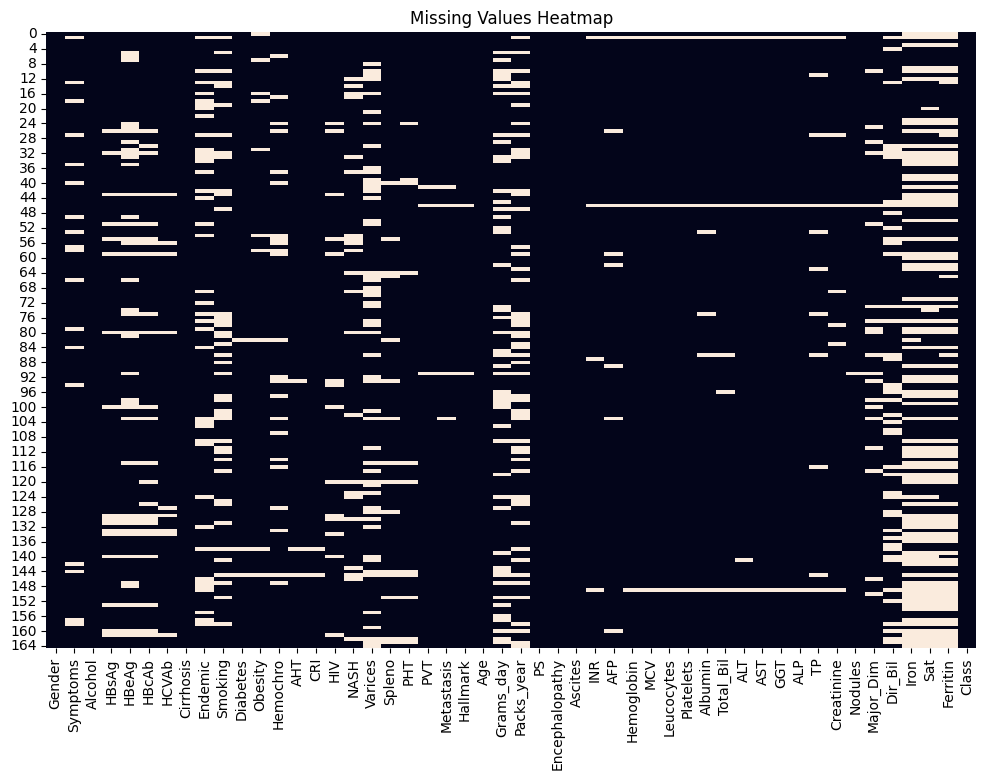

In [59]:
# Calculate percentage of missing values
missing_percentage = data_set.isnull().mean() * 100
# Print the 5 columns with the highest percentage of missing values
print("Top 5 columns with highest percentage of missing values:")
print(missing_percentage.nlargest(10))

plt.figure(figsize=(12, 8))
sb.heatmap(data_set.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

As we could see, columns like Iron, Sat and Ferritin have almost 50% of missing data, so the next step before removing them from the dataset should be, see if in fact, their information is that important to us.

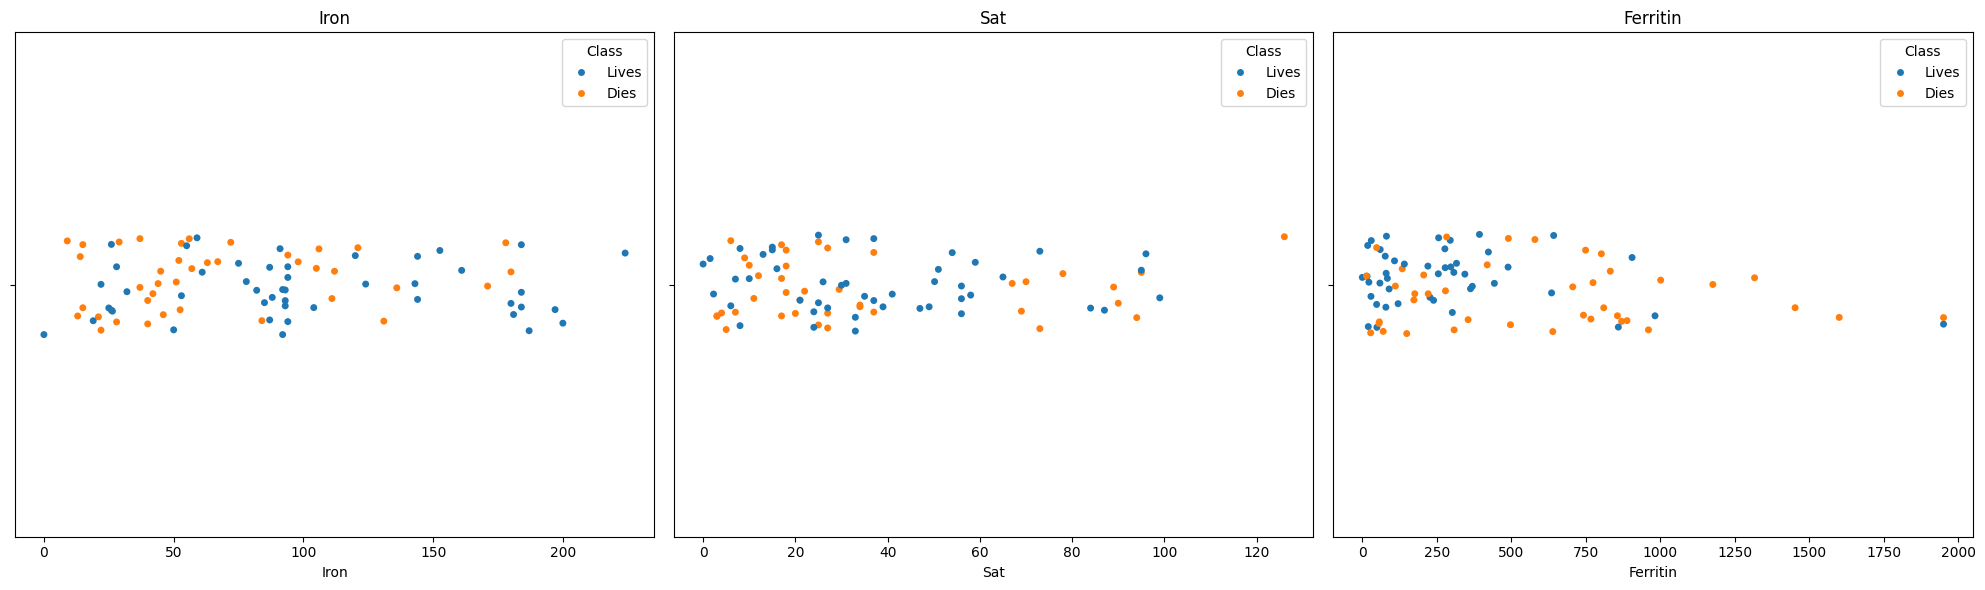

In [60]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot scatter plots for each column
for idx, column in enumerate(["Iron", "Sat", "Ferritin"]):
    sb.stripplot(x=column, hue="Class", data=data_set, ax=axes[idx])
    axes[idx].set_title(column)
    axes[idx].set_xlabel(column)
    axes[idx].set_ylabel("")

# Show the plot
plt.tight_layout()
plt.show()

Unlike the Sat column, the Ferritin and Iron seem to be valuable, since the low value of Iron typically shows us that tha patient dies, and the oposite for Ferritin. But Sat shows no indication of any pattern, added with the almost 50% of missing values seems like having no importance to the dataset, so the next step is to remove it.

In [61]:
# Remove the "Sat" column from the dataset
data_set.drop(columns=["Sat"], inplace=True)

Now the non numeric columns, lets see their relevance to the dataset:

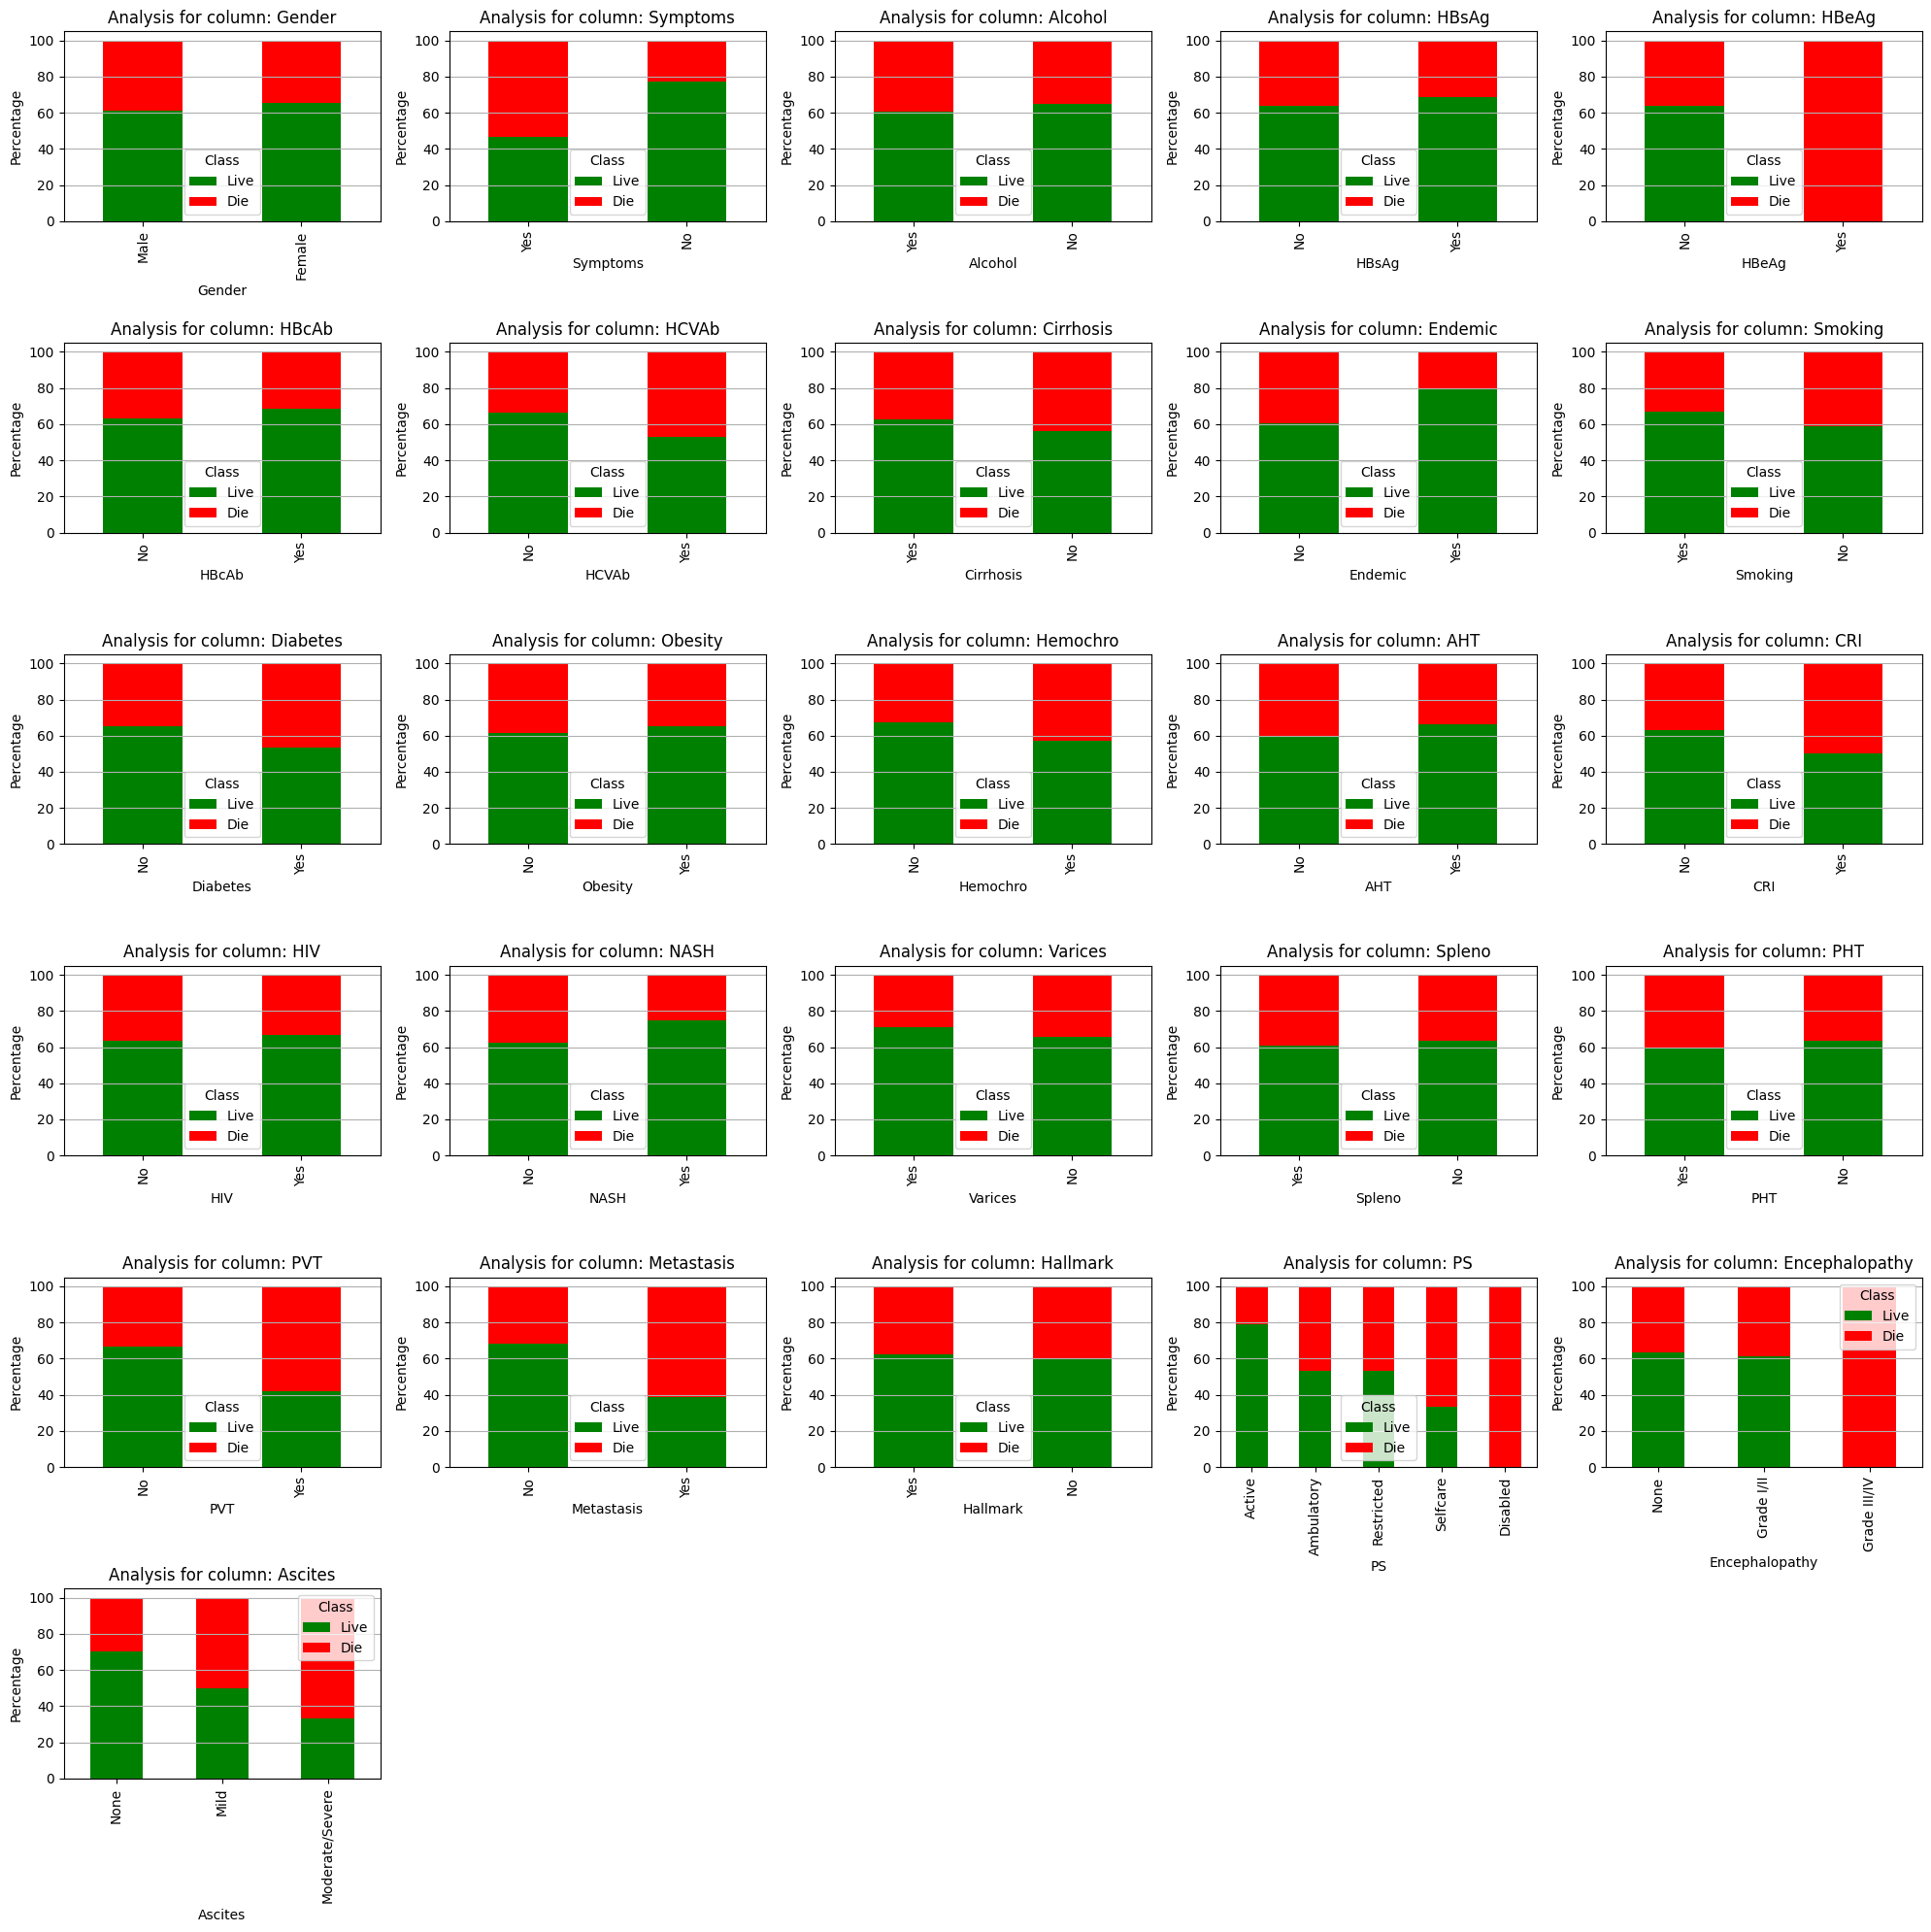

In [62]:
def analyze_non_numeric_columns_visual(df):
    # Filter out non-numeric columns except 'Class'
    non_numeric_columns = df.select_dtypes(exclude=['number']).columns
    non_numeric_columns = [col for col in non_numeric_columns if col != 'Class']
    
    # Define the number of rows and columns for the subplot grid
    n_cols = 5
    n_rows = -(-len(non_numeric_columns) // n_cols)  # Ceiling division to get number of rows
    
    # Set up the matplotlib figure
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    # Iterate over non-numeric columns
    for idx, column in enumerate(non_numeric_columns):
        ax = axes[idx]
        value_counts = df[column].value_counts(dropna=False)
        categories = value_counts.index

        # Initialize lists to hold the data
        live_percentages = []
        die_percentages = []
        labels = []

        for value in categories:
            if pd.notnull(value):  # Skip NaN values
                total_count = value_counts[value]
                live_count = df.loc[df[column] == value, "Class"].value_counts().get("Lives", 0)
                die_count = df.loc[df[column] == value, "Class"].value_counts().get("Dies", 0)
                live_percentage = (live_count / total_count) * 100
                die_percentage = (die_count / total_count) * 100
                live_percentages.append(live_percentage)
                die_percentages.append(die_percentage)
                labels.append(value)

        # Create a DataFrame for the percentages
        percentage_df = pd.DataFrame({
            'Category': labels,
            'Live': live_percentages,
            'Die': die_percentages
        })

        # Plot the data
        percentage_df.set_index('Category').plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'])
        ax.set_title(f"Analysis for column: {column}")
        ax.set_ylabel('Percentage')
        ax.set_xlabel(column)
        ax.legend(title='Class')
        ax.grid(axis='y')

    # Hide any unused subplots
    for j in range(len(non_numeric_columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Example usage:
analyze_non_numeric_columns_visual(data_set)


Even though, there still a dozen columns which the Class "Lives" or "Dies" only changes a few percentages on Yes or No answers, they may still be connected to one another, and together have even more relevance to the dataset, as so no changes will be done.

So now lets look at the patients who should be at risk of being removed from the dataset for lacking too much info: (Analysing those who have more then 25% of missing values)

In [63]:
# Step 1: Calculate the percentage of missing values for each patient
missing_percentage = data_set.isnull().mean(axis=1) * 100

# Step 2: Filter patients with more than 20% missing values
selected_patients = missing_percentage[missing_percentage > 25]

# Step 3: Output the numbers and rows of those patients
print("Patients with more than 25% missing values:")
selected_indices = selected_patients.index.tolist()
print(selected_indices)

# Display the rows of selected patients horizontally
selected_rows = data_set.loc[selected_indices]
print("Rows of selected patients:")
print(selected_rows.to_string(index=False))

Patients with more than 25% missing values:
[1, 46, 103, 145, 149]
Rows of selected patients:
Gender Symptoms Alcohol HBsAg HBeAg HBcAb HCVAb Cirrhosis Endemic Smoking Diabetes Obesity Hemochro AHT CRI HIV NASH Varices Spleno PHT PVT Metastasis Hallmark  Age  Grams_day  Packs_year         PS Encephalopathy         Ascites  INR  AFP  Hemoglobin  MCV  Leucocytes  Platelets  Albumin  Total_Bil   ALT    AST    GGT   ALP  TP  Creatinine  Nodules  Major_Dim  Dir_Bil  Iron  Ferritin Class
Female      NaN      No    No    No    No   Yes       Yes     NaN     NaN      Yes      No       No Yes  No  No   No     Yes     No  No  No         No      Yes   62        0.0         NaN     Active           None            None  NaN  NaN         NaN  NaN         NaN        NaN      NaN        NaN   NaN    NaN    NaN   NaN NaN         NaN      1.0        1.8      NaN   NaN       NaN Lives
Female      Yes      No    No    No    No    No        No      No      No       No      No       No  No  No  No   No    

Não sei se os retiramos ou não****************************************************************************************************************************************************************************

Now let's get rid of the missing values of the numeric columns by changing them to the average of said column.

In [64]:
# Function to fill missing values and print changes
def fill_missing_values(df):
    # Iterate over numeric columns
    for column in df.select_dtypes(include=['number']).columns:
        # Calculate the average of the column
        column_avg = df[column].mean()
        # Apply rounding based on average value
        if column_avg > 500:
            column_avg = round(column_avg)
        elif column_avg >= 10:
            column_avg = round(column_avg, 1)
        else:
            column_avg = round(column_avg, 3)
        # Fill missing values with the calculated average
        df[column] = df[column].fillna(column_avg)
        print(f"{column} -> {column_avg}")

    # Remove unnecessary zeros and format the numbers
    for column in df.select_dtypes(include=['number']).columns:
        df[column] = df[column].apply(lambda x: int(x) if float(x).is_integer() else round(x, 1))
        
# Apply the function to your existing DataFrame
fill_missing_values(data_set)

Age -> 64.7
Grams_day -> 71.0
Packs_year -> 16.7
INR -> 1.384
AFP -> 39.3
Hemoglobin -> 12.9
MCV -> 95.1
Leucocytes -> 7.035
Platelets -> 159109
Albumin -> 3.446
Total_Bil -> 3.088
ALT -> 63.3
AST -> 87.9
GGT -> 257.9
ALP -> 212.2
TP -> 7.013
Creatinine -> 1.056
Nodules -> 2.736
Major_Dim -> 6.844
Dir_Bil -> 1.13
Iron -> 85.6
Ferritin -> 433.2


Non numerical unkown values should not be changed like the numerical ones, becausa they would damage too much the results, as such let's change them to "Unknown"

In [65]:
def replace_nan_with_unknown(df):
    df.fillna('Unknown', inplace=True)

# Apply the function to your DataFrame
replace_nan_with_unknown(data_set)

In [66]:
pd.set_option('display.max_columns', None)
# Mostrar todas as linhas
pd.set_option('display.max_rows', None)
data_set 

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,Unknown,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137,15.0,Active,None,None,1.5,95.0,13.7,106.6,4.9,99000,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.7,1.0,3.5,0.5,85.6,433.2,Lives
1,Female,Unknown,No,No,No,No,Yes,Yes,Unknown,Unknown,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0,16.7,Active,None,None,1.4,39.3,12.9,95.1,7.0,159109,3.4,3.1,63.3,87.9,257.9,212.2,7.0,1.1,1.0,1.8,1.1,85.6,433.2,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50,50.0,Ambulatory,None,Mild,1.0,5.8,8.9,79.8,8.4,472000,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.1,5.0,13.0,0.1,28.0,16.0,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40,30.0,Active,None,None,0.9,2.4,13.4,97.1,9.0,279000,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.1,2.0,15.7,0.2,85.6,433.2,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100,30.0,Active,None,None,0.9,49.0,14.3,95.1,6.4,199000,4.1,0.7,147.0,238.2,173.0,109.0,6.9,1.8,1.0,9.0,1.1,59.0,22.0,Lives
5,Male,No,Yes,No,Unknown,No,No,Yes,No,Unknown,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,75,71,16.7,Restricted,None,Mild,1.6,110.0,13.4,91.5,5.4,85000,3.4,3.5,91.0,122.0,242.0,396.0,5.6,0.9,1.0,10.0,1.4,53.0,111.0,Dies
6,Male,No,No,No,Unknown,Yes,Yes,Yes,No,No,Yes,No,Unknown,No,No,No,No,No,No,No,No,No,Yes,49,0,0.0,Active,None,None,1.4,138.9,10.4,102.0,3.2,42000,2.4,2.7,119.0,183.0,143.0,211.0,7.3,0.8,5.0,2.6,2.2,171.0,1452.0,Dies
7,Male,Yes,Yes,No,Unknown,No,No,Yes,No,Yes,Yes,Unknown,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,61,71,20.0,Selfcare,None,None,1.5,9.9,10.8,92.0,3.0,58000,3.1,3.2,79.0,108.0,184.0,300.0,7.1,0.5,2.0,9.0,1.3,42.0,706.0,Dies
8,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,Unknown,Yes,Yes,No,No,Yes,50,100,32.0,Restricted,None,Mild,2.2,8.8,11.9,107.5,4.9,70000,1.9,3.3,26.0,59.0,115.0,63.0,6.1,0.6,1.0,6.4,1.2,85.0,982.0,Lives
9,Male,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,43,100,0.0,Active,None,None,1.1,1.8,11.8,87.8,5.1,193000,4.2,0.5,71.0,45.0,256.0,303.0,7.1,0.6,1.0,9.3,0.7,85.6,433.2,Lives
